In [1]:
from MCEq.core import MCEqRun
import crflux.models as pm
import numpy as np

In [2]:
mceq_run = MCEqRun(
        #provide the string of the interaction model
        interaction_model="DPMJETIII191",
        #primary cosmic ray flux model
        primary_model = (pm.HillasGaisser2012, "H3a"),
        # Zenith angle in degrees. 0=vertical, 90=horizontal
        theta_deg=0.0
        )

MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


In [7]:
energy_grid = np.geomspace(1e-2, 1e11, 1000, dtype='float64')

In [17]:
res_sigma = dict()

for p in mceq_run.pman.all_particles:
    
    res_sigma[p.name] = np.interp(energy_grid, 
          mceq_run._int_cs.energy_grid.c + p.mass, 
          mceq_run._int_cs.get_cs(p.pdg_id[0], True))
    # print(p.name, p.pdg_id[0], p.mass)

In [21]:
res = np.interp(energy_grid, 
          mceq_run._int_cs.energy_grid.c + 0.13957, 
          mceq_run._int_cs.get_cs(211, True))

In [9]:
print(res[0:12])
print(energy_grid[0:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.01       0.01030417 0.01061759 0.01094055 0.01127333 0.01161623
 0.01196956 0.01233363 0.01270879 0.01309535 0.01349367 0.01390411]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

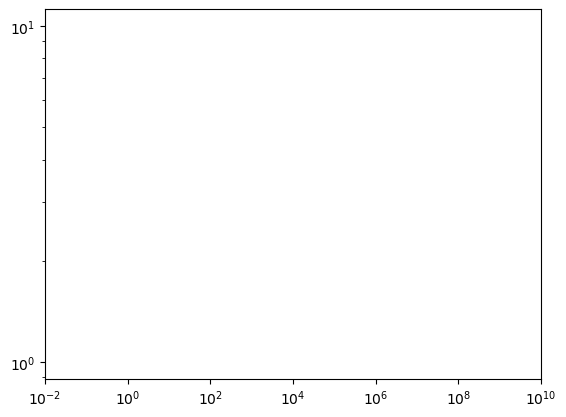

In [21]:
import matplotlib.pyplot as plt

plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-2, 1e10)
for p in mceq_run.pman.all_particles:
    if p.pdg_id[0] in [-13, 13]:
        plt.plot(energy_grid, res_sigma[p.name], label=p.name)

# res_sigma["mu-"]
# plt.legend()    